In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
class Plotter:
    def __init__(self, dataframe, default_palette="viridis"):
        self.dataframe = dataframe
        self.color_palette = sns.color_palette(default_palette)
        sns.set_style("whitegrid")

    def scatterplot(self, x, y, figsize=(8, 6), hue=None, palette=None):
        plt.figure(figsize=figsize)
        sns.scatterplot(data=self.dataframe, x=x, y=y, hue=hue, 
                        palette=palette or self.color_palette)
        plt.title(f"Scatterplot of {x} vs {y}")
        plt.show()

    def histogram(self, column, figsize=(8, 6), bins=25, palette=None):
        plt.figure(figsize=figsize)
        sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True, 
                     palette=palette or self.color_palette)
        plt.title(f"Histogram of {column}")
        plt.show()

    def barplot(self, x, y, hue=None, figsize=(12, 6), palette=None):
        plt.figure(figsize=figsize)
        sns.barplot(data=self.dataframe, x=x, y=y, hue=hue, palette=palette or self.color_palette)
        plt.title(f"Barplot of {y} by {x}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def boxplot(self, x, y, hue=None, figsize=(12, 6), box_width=0.5, palette=None):
        plt.figure(figsize=figsize)
        sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width, 
                    palette=palette or self.color_palette)
        plt.title(f"Boxplot of {y} by {x}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def stripplot(self, x, y, figsize=(8, 6), hue=None, palette=None):
        plt.figure(figsize=figsize)
        sns.stripplot(data=self.dataframe, x=x, y=y, hue=hue, jitter=True, 
                      palette=palette or self.color_palette)
        plt.title(f"Stripplot of {y} by {x}")
        plt.show()

    def jointplot(self, x, y, kind="scatter", height=6, hue=None, legend_fontsize=10, palette=None):
        g = sns.jointplot(data=self.dataframe, x=x, y=y, kind=kind, hue=hue, 
                          palette=palette or self.color_palette, height=height)
        plt.suptitle(f"Jointplot of {x} and {y}", y=1.02)
        if hue:
            legend = g.ax_joint.legend_
            if legend:
                for text in legend.get_texts():
                    text.set_fontsize(legend_fontsize)
                legend.get_title().set_fontsize(legend_fontsize)
        plt.show()

    def jointplotkde(self, x, y, kind="kde", hue=None, height=6, cmap="viridis", legend_fontsize=10):
        g = sns.jointplot(data=self.dataframe, x=x, y=y, kind=kind, cmap=cmap, hue=hue, fill=True, height=height)
        plt.suptitle(f"Jointplot of {x} and {y}", y=1.02)
        if hue:
            legend = g.ax_joint.legend_
            if legend:
                for text in legend.get_texts():
                    text.set_fontsize(legend_fontsize)
                legend.get_title().set_fontsize(legend_fontsize)
        plt.show()

    def pairplot(self, hue=None, palette=None):
        sns.pairplot(self.dataframe, hue=hue, palette=palette or self.color_palette)
        plt.suptitle("Pairplot", y=1.02)
        plt.show()

    def heatmap(self, figsize=(10, 8), cmap="viridis"):
        numeric_df = self.dataframe.select_dtypes(include=["number"])
        plt.figure(figsize=figsize)
        corr = numeric_df.corr()
        sns.heatmap(corr, annot=True, cmap=cmap, fmt=".2f")
        plt.title("Heatmap of Correlation Matrix")
        plt.show()

    def clustermap(self, figsize=(10, 8), cmap="viridis"):
        numeric_df = self.dataframe.select_dtypes(include=["number"])
        corr = numeric_df.corr()
        sns.clustermap(corr, annot=True, cmap=cmap, fmt=".2f", figsize=figsize)
        plt.show()

    def nulls_barplot(self, figsize=(8, 6), palette=["red", "green"]):
        total_nulls = self.dataframe.isna().sum().sum()
        total_values = self.dataframe.size - total_nulls
        data = pd.DataFrame({"Dcontent": ["Nulls", "Values"], "Count": [total_nulls, total_values]})
        plt.figure(figsize=figsize)
        sns.barplot(data=data, x="Dcontent", y="Count", hue="Dcontent", palette=palette)
        plt.title("Total Nulls vs Total Values")
        plt.ylabel("Count")
        plt.xlabel("")
        plt.show()

In [ ]:

class DataTransform:
    def __init__(self, df):
        if not isinstance(df, pd.DataFrame):
            raise ValueError("Input must be a Pandas DataFrame.")
        self.df = df

    def change_dtypes(self, dtype_dict):
        try:
            for column, dtype in dtype_dict.items():
                if column in self.df.columns:
                    if dtype == "datetime64":
                        self.df[column] = pd.to_datetime(self.df[column], errors='coerce')
                    elif dtype == "boolean":
                        self.df[column] = self.df[column].map({'y': True, 'n': False})
                    else:
                        self.df[column] = self.df[column].astype(dtype, errors='ignore')
                else:
                    raise KeyError(f"Column '{column}' not found in DataFrame.")
            return self.df
        except Exception as e:
            raise RuntimeError(f"Error whilst changing datatypes: {e}")

if __name__ == "__main__":
    df = pd.read_csv("/Users/max/coding_resources/finance_loan_project/flp_df/flp_df2_nullimpute.csv")

    transformer = DataTransform(df)

    dtype_dict = {
        "id": "int64",
        "member_id": "int64",
        "loan_amount": "float64",
        "funded_amount": "float64",
        "funded_amount_inv": "float64",
        "term": "category",
        "int_rate": "float64",
        "instalment": "float64",
        "grade": "category",
        "sub_grade": "category",
        "employment_length": "category",
        "home_ownership": "category",
        "annual_inc": "float64",
        "verification_status": "category",
        "issue_date": "datetime64",
        "loan_status": "category",
        "payment_plan": "bool",
        "purpose": "category",
        "dti": "float64",
        "delinq_2yrs": "int64",
        "earliest_credit_line": "datetime64",
        "inq_last_6mths": "int64",
        "mths_since_last_delinq": "int64",
        "mths_since_last_record": "int64",
        "open_accounts": "int64",
        "total_accounts": "int64",
        "out_prncp": "float64",
        "out_prncp_inv": "float64",
        "total_payment": "float64",
        "total_payment_inv": "float64",
        "total_rec_prncp": "float64",
        "total_rec_int": "float64",
        "total_rec_late_fee": "float64",
        "recoveries": "float64",
        "collection_recovery_fee": "float64",
        "last_payment_date": "datetime64",
        "last_payment_amount": "float64",
        "next_payment_date": "datetime64",
        "last_credit_pull_date": "datetime64",
        "collections_12_mths_ex_med": "category",
        "mths_since_last_major_derog": "int64",
        "policy_code": "int64",
        "application_type": "category"
    }

    df_trans = transformer.change_dtypes(dtype_dict)

    print("\nTransformed DataFrame dtypes:\n")
    dtype_df = pd.DataFrame({"Columns" : df_trans.columns, "Dtype" : df_trans.dtypes}).reset_index(drop=True) # create df with the now changed dtypes.
    print(dtype_df.sort_values("Columns").reset_index(drop=True)) # sort by column and print indexed for clarity and to make sure has worked. 



Transformed DataFrame dtypes:

                        Columns           Dtype
0                    annual_inc         float64
1              application_type        category
2       collection_recovery_fee         float64
3    collections_12_mths_ex_med        category
4                   delinq_2yrs           int64
5                           dti         float64
6          earliest_credit_line  datetime64[ns]
7             employment_length        category
8                 funded_amount         float64
9             funded_amount_inv         float64
10                        grade        category
11               home_ownership        category
12                           id           int64
13               inq_last_6mths           int64
14                   instalment         float64
15                     int_rate         float64
16                   issue_date  datetime64[ns]
17        last_credit_pull_date  datetime64[ns]
18          last_payment_amount         float64
19      

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_30387/4272068302.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True,


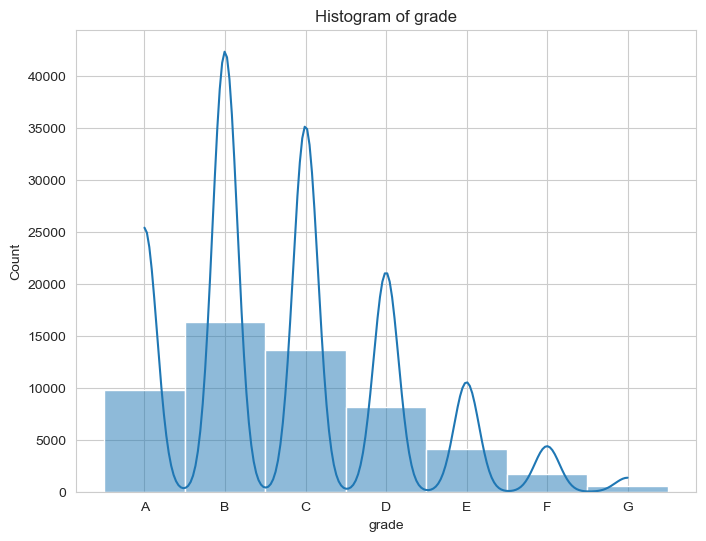

In [7]:
plotter_test = Plotter(df_trans) # test that the plotter working. 

plotter_test.histogram("grade")

In [8]:
def sum_nulls(df): # summerize the nulls.
    null_counts = df.isnull().sum()
    total_rows = len(df)
    null_percentages = (null_counts / total_rows) * 100

    summary = pd.DataFrame({
        'Column': df.columns,
        'Null Count': null_counts,
        'Null Percentage': null_percentages
    }).reset_index(drop=True)

    return summary

sum_nulls(df_trans).sort_values("Null Percentage", ascending=False)

,Column,Null Count,Null Percentage
23,mths_since_last_record,48050,88.602460
40,mths_since_last_major_derog,46732,86.172116
37,next_payment_date,32608,60.127971
22,mths_since_last_delinq,31002,57.166565
6,int_rate,5169,9.531449
5,term,4772,8.799395
3,funded_amount,3007,5.544799
10,employment_length,2118,3.905515
35,last_payment_date,73,0.134609
39,collections_12_mths_ex_med,51,0.094042


In [10]:
def onlynulls(df): #summerize only the nulls. 
    columns_with_nulls = df.columns[df.isnull().any()]
    df_with_nulls = df[columns_with_nulls]
    null_counts = df_with_nulls.isnull().sum()
    total_rows = len(df_with_nulls)
    null_percentages = (null_counts / total_rows) * 100

    summary = pd.DataFrame({
        'Column': df_with_nulls.columns,
        'Null Count': null_counts,
        'Null Percentage': null_percentages
    }).reset_index(drop=True)

    return summary

onlynulls(df_trans).sort_values(by="Null Percentage", ascending=False).reset_index(drop=True)

,Column,Null Count,Null Percentage
0,mths_since_last_record,48050,88.602460
1,mths_since_last_major_derog,46732,86.172116
2,next_payment_date,32608,60.127971
3,mths_since_last_delinq,31002,57.166565
4,int_rate,5169,9.531449
5,term,4772,8.799395
6,funded_amount,3007,5.544799
7,employment_length,2118,3.905515
8,last_payment_date,73,0.134609
9,collections_12_mths_ex_med,51,0.094042


In [11]:
def drop_cols(df, columns_to_drop): # drop columns function 
        dropped = df.drop(columns=columns_to_drop, axis=1) # use the .drop function, along with axis=1 to refer to the columns and not rows. 
        return dropped 

list_col_drop = ["mths_since_last_record", 
                 "mths_since_last_major_derog",
                 "next_payment_date", 
                 "mths_since_last_delinq"]  # list of columns I want to drop. All in this list have over 50% null values. and my threshold was 30%. 

df_dropsum = drop_cols(df_trans, list_col_drop) # create a new df with columns dropped. 

onlynulls(df_dropsum).sort_values(by="Null Percentage", ascending=False).reset_index(drop=True) # print new df with dropped columns. 

,Column,Null Count,Null Percentage
0,int_rate,5169,9.531449
1,term,4772,8.799395
2,funded_amount,3007,5.544799
3,employment_length,2118,3.905515
4,last_payment_date,73,0.134609
5,collections_12_mths_ex_med,51,0.094042
6,last_credit_pull_date,7,0.012908


In [12]:
class DataFrameTransform: # Dataframe transform class 
    @staticmethod
    def impute_mean(df, column_name):
        if column_name in df.columns and df[column_name].dtype in [np.float64, np.int64]:
            mean_value = df[column_name].mean()
            df = df.copy()
            df.loc[df[column_name].isna(), column_name] = mean_value
            print(f"Imputed mean value {mean_value:.2f} into null values of '{column_name}'")
        return df

    @staticmethod
    def impute_median(df, column_name):
        if column_name in df.columns and df[column_name].dtype in [np.float64, np.int64]:
            median_value = df[column_name].median()
            df = df.copy()
            df.loc[df[column_name].isna(), column_name] = median_value
            print(f"Imputed median value {median_value:.2f} into null values of '{column_name}'")
        return df

    @staticmethod
    def impute_mode(df, column_name):
        if column_name in df.columns:
            mode_value = df[column_name].mode()
            if not mode_value.empty:
                df = df.copy()
                df.loc[df[column_name].isna(), column_name] = mode_value[0]
                print(f"Imputed mode value '{mode_value[0]}' into null values of '{column_name}'")
        return df

In [13]:
impute = DataFrameTransform # intialize Class. 

"""
Had a look at the data and worked out which average was best to use and impute,
for the categorical data, could only use mode, as it's all formatted as nominal.
Have my reasoning written down on pages doc. that will be uploaded to github. 

"""


df_imputed = impute.impute_mean(df_dropsum, "int_rate") # impute mean
df_imputed = impute.impute_mode(df_imputed, "term") # as @staticmethod used don't have to keep intializing new Class instances and can directly update same df iterably. 
df_imputed = impute.impute_median(df_imputed, "funded_amount")
df_imputed = impute.impute_mode(df_imputed, "employment_length")
df_imputed = impute.impute_mode(df_imputed, "last_payment_date")
df_imputed = impute.impute_mode(df_imputed, "collections_12_mths_ex_med")
df_imputed = impute.impute_mode(df_imputed, "last_credit_pull_date")


csv_file_path = "/Users/max/coding_resources/finance_loan_project/flp_df/flp_df_imputed.csv"
df_imputed.to_csv(csv_file_path, index=False)

print("Imputed DataFrame saved successfully!")


Imputed mean value 13.51 into null values of 'int_rate'
Imputed mode value '36 months' into null values of 'term'
Imputed median value 12000.00 into null values of 'funded_amount'
Imputed mode value '10+ years' into null values of 'employment_length'
Imputed mode value '2022-01-01 00:00:00' into null values of 'last_payment_date'
Imputed mode value '0.0' into null values of 'collections_12_mths_ex_med'
Imputed mode value '2022-01-01 00:00:00' into null values of 'last_credit_pull_date'
Imputed DataFrame saved successfully!
